# Challenge

## Mácio Matheus Santos de Arruda

Objetivo: previsão do IPCA (Índice Nacional de Preços ao Consumidor Amplo) do próximo mês.

Prêmio: a metodologia que obtiver o menor MAE para as previsões de Jan/2017 a Set/2018 (base de dados de teste) ganhará um livro de Inteligência Artificial! Rode o seu método 30 vezes e obtenha a média e o desvio-padrão dos resultados.

### Dependências

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import warnings
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
series = pd.read_csv('../dataset/dataset-desafio.csv', index_col='Month', header=0)
dataframe = pd.read_csv('../dataset/dataset-desafio.csv', usecols=[0,1], engine='python', skipfooter=3)

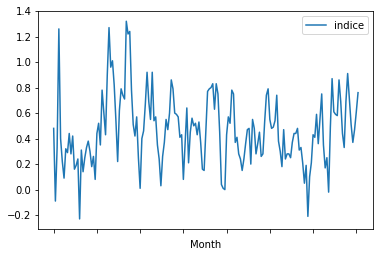

In [4]:
series.plot()

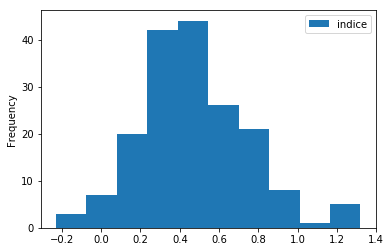

In [5]:
series.plot.hist()

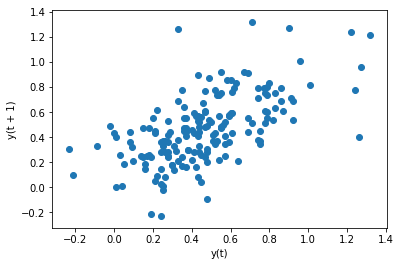

In [6]:
lag_plot(series)

## LSTM for IPCA forecast (Experiment executed 30 x)


![title](https://developer.nvidia.com/sites/default/files/pictures/2018/lstm.png)

In [7]:
def train_lstm(dataframe):
    # LSTM for IPCA Problem
    import numpy
    import math
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import LSTM
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import mean_squared_error

    # create dataset matrix
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return numpy.array(dataX), numpy.array(dataY)

    dataframe.sort_values(by='Month', ascending=True, inplace=True)
    dataset = dataframe['indice'].to_frame()
    dataset = dataset.astype('float32')

    # normalize
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    # Split train / test(Jan/2017 a Set/2018)
    train_size = 156
    test_size = len(dataset) - train_size
    train = dataset[0:train_size]
    test = dataset[train_size:len(dataset)]
    
    # reshape into X=t and Y=t+1
    look_back = 3
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='sgd')
    model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)
    model.summary()
    
    # make predictions
    train_predict = model.predict(trainX)
    test_predict = model.predict(testX)

    # invert predictions
    train_predict = scaler.inverse_transform(train_predict)
    trainY = scaler.inverse_transform([trainY])
    test_predict = scaler.inverse_transform(test_predict)
    testY = scaler.inverse_transform([testY])
    
    # calculate root mean squared error
    train_score = math.sqrt(mean_squared_error(trainY[0], train_predict[:,0]))
    print('Train RMSE: %.2f' % (train_score))
    test_score = math.sqrt(mean_squared_error(testY[0], test_predict[:,0]))
    print('Test RMSE: %.2f' % (test_score))

    train_score = mean_absolute_error(trainY[0], train_predict[:,0])
    print('Train MAE: %.2f' % (train_score))
    test_score = mean_absolute_error(testY[0], test_predict[:,0])
    print('Test MAE: %.2f' % (test_score))

    # shift train predictions for plotting
    train_predict_plot = numpy.empty_like(dataset)
    train_predict_plot[:, :] = numpy.nan
    train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

    # shift test predictions for plotting
    test_predict_plot = numpy.empty_like(dataset)
    test_predict_plot[:, :] = numpy.nan
    test_predict_plot[len(train_predict) + (look_back*2)+1:len(dataset)-1, :] = test_predict
    
    baseline = scaler.inverse_transform(dataset)
    mae_train = mean_absolute_error(trainY[0], train_predict[:,0])
    mae_test = mean_absolute_error(testY[0], test_predict[:,0])
    
    return baseline, train_predict_plot, test_predict_plot, mae_train, mae_test

experiments = []
for i in range(30):
    print(f'Start experiment {(i + 1)}')
    experiments.append(train_lstm(dataframe))
    print(f'End experiment {(i + 1)}')

Start experiment 1


Using TensorFlow backend.


Epoch 1/200
 - 1s - loss: 0.0493
Epoch 2/200
 - 0s - loss: 0.0281
Epoch 3/200
 - 0s - loss: 0.0282
Epoch 4/200
 - 0s - loss: 0.0280
Epoch 5/200
 - 0s - loss: 0.0279
Epoch 6/200
 - 1s - loss: 0.0279
Epoch 7/200
 - 1s - loss: 0.0277
Epoch 8/200
 - 1s - loss: 0.0276
Epoch 9/200
 - 1s - loss: 0.0273
Epoch 10/200
 - 1s - loss: 0.0278
Epoch 11/200
 - 1s - loss: 0.0275
Epoch 12/200
 - 1s - loss: 0.0277
Epoch 13/200
 - 1s - loss: 0.0275
Epoch 14/200
 - 1s - loss: 0.0274
Epoch 15/200
 - 1s - loss: 0.0271
Epoch 16/200
 - 0s - loss: 0.0275
Epoch 17/200
 - 1s - loss: 0.0272
Epoch 18/200
 - 1s - loss: 0.0270
Epoch 19/200
 - 0s - loss: 0.0272
Epoch 20/200
 - 1s - loss: 0.0272
Epoch 21/200
 - 1s - loss: 0.0271
Epoch 22/200
 - 0s - loss: 0.0269
Epoch 23/200
 - 0s - loss: 0.0270
Epoch 24/200
 - 1s - loss: 0.0270
Epoch 25/200
 - 1s - loss: 0.0269
Epoch 26/200
 - 1s - loss: 0.0271
Epoch 27/200
 - 1s - loss: 0.0267
Epoch 28/200
 - 1s - loss: 0.0270
Epoch 29/200
 - 1s - loss: 0.0266
Epoch 30/200
 - 1s - lo

 - 0s - loss: 0.0286
Epoch 20/200
 - 0s - loss: 0.0287
Epoch 21/200
 - 1s - loss: 0.0284
Epoch 22/200
 - 1s - loss: 0.0285
Epoch 23/200
 - 1s - loss: 0.0285
Epoch 24/200
 - 0s - loss: 0.0285
Epoch 25/200
 - 0s - loss: 0.0284
Epoch 26/200
 - 0s - loss: 0.0284
Epoch 27/200
 - 1s - loss: 0.0284
Epoch 28/200
 - 0s - loss: 0.0280
Epoch 29/200
 - 0s - loss: 0.0280
Epoch 30/200
 - 0s - loss: 0.0283
Epoch 31/200
 - 0s - loss: 0.0282
Epoch 32/200
 - 0s - loss: 0.0281
Epoch 33/200
 - 0s - loss: 0.0279
Epoch 34/200
 - 0s - loss: 0.0280
Epoch 35/200
 - 1s - loss: 0.0280
Epoch 36/200
 - 0s - loss: 0.0280
Epoch 37/200
 - 1s - loss: 0.0280
Epoch 38/200
 - 0s - loss: 0.0276
Epoch 39/200
 - 1s - loss: 0.0277
Epoch 40/200
 - 0s - loss: 0.0277
Epoch 41/200
 - 0s - loss: 0.0279
Epoch 42/200
 - 1s - loss: 0.0274
Epoch 43/200
 - 0s - loss: 0.0275
Epoch 44/200
 - 1s - loss: 0.0278
Epoch 45/200
 - 0s - loss: 0.0276
Epoch 46/200
 - 1s - loss: 0.0277
Epoch 47/200
 - 1s - loss: 0.0276
Epoch 48/200
 - 0s - loss: 

 - 1s - loss: 0.0304
Epoch 38/200
 - 1s - loss: 0.0304
Epoch 39/200
 - 1s - loss: 0.0302
Epoch 40/200
 - 0s - loss: 0.0303
Epoch 41/200
 - 0s - loss: 0.0300
Epoch 42/200
 - 2s - loss: 0.0300
Epoch 43/200
 - 0s - loss: 0.0301
Epoch 44/200
 - 0s - loss: 0.0301
Epoch 45/200
 - 0s - loss: 0.0299
Epoch 46/200
 - 0s - loss: 0.0300
Epoch 47/200
 - 2s - loss: 0.0300
Epoch 48/200
 - 0s - loss: 0.0294
Epoch 49/200
 - 1s - loss: 0.0300
Epoch 50/200
 - 1s - loss: 0.0297
Epoch 51/200
 - 1s - loss: 0.0297
Epoch 52/200
 - 0s - loss: 0.0297
Epoch 53/200
 - 1s - loss: 0.0296
Epoch 54/200
 - 1s - loss: 0.0296
Epoch 55/200
 - 1s - loss: 0.0297
Epoch 56/200
 - 0s - loss: 0.0290
Epoch 57/200
 - 0s - loss: 0.0295
Epoch 58/200
 - 1s - loss: 0.0294
Epoch 59/200
 - 1s - loss: 0.0295
Epoch 60/200
 - 0s - loss: 0.0293
Epoch 61/200
 - 0s - loss: 0.0294
Epoch 62/200
 - 0s - loss: 0.0293
Epoch 63/200
 - 0s - loss: 0.0293
Epoch 64/200
 - 1s - loss: 0.0292
Epoch 65/200
 - 1s - loss: 0.0293
Epoch 66/200
 - 1s - loss: 

 - 0s - loss: 0.0270
Epoch 56/200
 - 0s - loss: 0.0271
Epoch 57/200
 - 0s - loss: 0.0270
Epoch 58/200
 - 0s - loss: 0.0269
Epoch 59/200
 - 1s - loss: 0.0269
Epoch 60/200
 - 0s - loss: 0.0270
Epoch 61/200
 - 1s - loss: 0.0268
Epoch 62/200
 - 1s - loss: 0.0269
Epoch 63/200
 - 0s - loss: 0.0270
Epoch 64/200
 - 1s - loss: 0.0268
Epoch 65/200
 - 0s - loss: 0.0269
Epoch 66/200
 - 0s - loss: 0.0267
Epoch 67/200
 - 0s - loss: 0.0267
Epoch 68/200
 - 0s - loss: 0.0267
Epoch 69/200
 - 1s - loss: 0.0265
Epoch 70/200
 - 1s - loss: 0.0266
Epoch 71/200
 - 1s - loss: 0.0267
Epoch 72/200
 - 1s - loss: 0.0267
Epoch 73/200
 - 1s - loss: 0.0267
Epoch 74/200
 - 1s - loss: 0.0267
Epoch 75/200
 - 1s - loss: 0.0265
Epoch 76/200
 - 1s - loss: 0.0264
Epoch 77/200
 - 1s - loss: 0.0267
Epoch 78/200
 - 0s - loss: 0.0265
Epoch 79/200
 - 1s - loss: 0.0267
Epoch 80/200
 - 0s - loss: 0.0264
Epoch 81/200
 - 1s - loss: 0.0266
Epoch 82/200
 - 1s - loss: 0.0266
Epoch 83/200
 - 1s - loss: 0.0263
Epoch 84/200
 - 1s - loss: 

 - 1s - loss: 0.0283
Epoch 74/200
 - 0s - loss: 0.0289
Epoch 75/200
 - 0s - loss: 0.0287
Epoch 76/200
 - 0s - loss: 0.0287
Epoch 77/200
 - 0s - loss: 0.0285
Epoch 78/200
 - 0s - loss: 0.0284
Epoch 79/200
 - 0s - loss: 0.0287
Epoch 80/200
 - 0s - loss: 0.0285
Epoch 81/200
 - 1s - loss: 0.0284
Epoch 82/200
 - 0s - loss: 0.0283
Epoch 83/200
 - 0s - loss: 0.0280
Epoch 84/200
 - 0s - loss: 0.0283
Epoch 85/200
 - 0s - loss: 0.0284
Epoch 86/200
 - 0s - loss: 0.0280
Epoch 87/200
 - 0s - loss: 0.0280
Epoch 88/200
 - 0s - loss: 0.0282
Epoch 89/200
 - 1s - loss: 0.0282
Epoch 90/200
 - 1s - loss: 0.0279
Epoch 91/200
 - 1s - loss: 0.0282
Epoch 92/200
 - 1s - loss: 0.0281
Epoch 93/200
 - 1s - loss: 0.0281
Epoch 94/200
 - 1s - loss: 0.0279
Epoch 95/200
 - 1s - loss: 0.0280
Epoch 96/200
 - 1s - loss: 0.0278
Epoch 97/200
 - 1s - loss: 0.0278
Epoch 98/200
 - 1s - loss: 0.0279
Epoch 99/200
 - 0s - loss: 0.0278
Epoch 100/200
 - 1s - loss: 0.0278
Epoch 101/200
 - 1s - loss: 0.0278
Epoch 102/200
 - 1s - los

 - 1s - loss: 0.0282
Epoch 92/200
 - 0s - loss: 0.0282
Epoch 93/200
 - 0s - loss: 0.0282
Epoch 94/200
 - 1s - loss: 0.0279
Epoch 95/200
 - 0s - loss: 0.0282
Epoch 96/200
 - 0s - loss: 0.0279
Epoch 97/200
 - 0s - loss: 0.0280
Epoch 98/200
 - 0s - loss: 0.0281
Epoch 99/200
 - 1s - loss: 0.0280
Epoch 100/200
 - 1s - loss: 0.0278
Epoch 101/200
 - 2s - loss: 0.0278
Epoch 102/200
 - 0s - loss: 0.0279
Epoch 103/200
 - 0s - loss: 0.0277
Epoch 104/200
 - 0s - loss: 0.0278
Epoch 105/200
 - 0s - loss: 0.0274
Epoch 106/200
 - 0s - loss: 0.0278
Epoch 107/200
 - 0s - loss: 0.0276
Epoch 108/200
 - 0s - loss: 0.0277
Epoch 109/200
 - 0s - loss: 0.0275
Epoch 110/200
 - 1s - loss: 0.0276
Epoch 111/200
 - 1s - loss: 0.0274
Epoch 112/200
 - 1s - loss: 0.0275
Epoch 113/200
 - 1s - loss: 0.0272
Epoch 114/200
 - 1s - loss: 0.0278
Epoch 115/200
 - 1s - loss: 0.0275
Epoch 116/200
 - 0s - loss: 0.0275
Epoch 117/200
 - 1s - loss: 0.0274
Epoch 118/200
 - 0s - loss: 0.0273
Epoch 119/200
 - 0s - loss: 0.0274
Epoch 1

 - 1s - loss: 0.0279
Epoch 110/200
 - 1s - loss: 0.0280
Epoch 111/200
 - 1s - loss: 0.0279
Epoch 112/200
 - 1s - loss: 0.0278
Epoch 113/200
 - 1s - loss: 0.0278
Epoch 114/200
 - 1s - loss: 0.0279
Epoch 115/200
 - 1s - loss: 0.0274
Epoch 116/200
 - 1s - loss: 0.0278
Epoch 117/200
 - 1s - loss: 0.0275
Epoch 118/200
 - 1s - loss: 0.0277
Epoch 119/200
 - 1s - loss: 0.0276
Epoch 120/200
 - 1s - loss: 0.0275
Epoch 121/200
 - 1s - loss: 0.0276
Epoch 122/200
 - 1s - loss: 0.0276
Epoch 123/200
 - 1s - loss: 0.0275
Epoch 124/200
 - 1s - loss: 0.0274
Epoch 125/200
 - 1s - loss: 0.0271
Epoch 126/200
 - 1s - loss: 0.0274
Epoch 127/200
 - 1s - loss: 0.0273
Epoch 128/200
 - 0s - loss: 0.0273
Epoch 129/200
 - 1s - loss: 0.0273
Epoch 130/200
 - 1s - loss: 0.0269
Epoch 131/200
 - 1s - loss: 0.0273
Epoch 132/200
 - 1s - loss: 0.0271
Epoch 133/200
 - 1s - loss: 0.0272
Epoch 134/200
 - 0s - loss: 0.0271
Epoch 135/200
 - 0s - loss: 0.0272
Epoch 136/200
 - 0s - loss: 0.0270
Epoch 137/200
 - 1s - loss: 0.0267

Epoch 127/200
 - 1s - loss: 0.0272
Epoch 128/200
 - 1s - loss: 0.0268
Epoch 129/200
 - 0s - loss: 0.0272
Epoch 130/200
 - 1s - loss: 0.0271
Epoch 131/200
 - 1s - loss: 0.0267
Epoch 132/200
 - 1s - loss: 0.0270
Epoch 133/200
 - 0s - loss: 0.0268
Epoch 134/200
 - 1s - loss: 0.0270
Epoch 135/200
 - 0s - loss: 0.0269
Epoch 136/200
 - 0s - loss: 0.0268
Epoch 137/200
 - 0s - loss: 0.0269
Epoch 138/200
 - 1s - loss: 0.0269
Epoch 139/200
 - 1s - loss: 0.0266
Epoch 140/200
 - 1s - loss: 0.0269
Epoch 141/200
 - 1s - loss: 0.0268
Epoch 142/200
 - 1s - loss: 0.0260
Epoch 143/200
 - 0s - loss: 0.0271
Epoch 144/200
 - 1s - loss: 0.0267
Epoch 145/200
 - 0s - loss: 0.0262
Epoch 146/200
 - 1s - loss: 0.0266
Epoch 147/200
 - 0s - loss: 0.0262
Epoch 148/200
 - 1s - loss: 0.0266
Epoch 149/200
 - 0s - loss: 0.0264
Epoch 150/200
 - 0s - loss: 0.0265
Epoch 151/200
 - 0s - loss: 0.0266
Epoch 152/200
 - 0s - loss: 0.0260
Epoch 153/200
 - 1s - loss: 0.0267
Epoch 154/200
 - 1s - loss: 0.0267
Epoch 155/200
 - 1s 

 - 0s - loss: 0.0257
Epoch 145/200
 - 0s - loss: 0.0256
Epoch 146/200
 - 0s - loss: 0.0261
Epoch 147/200
 - 0s - loss: 0.0258
Epoch 148/200
 - 1s - loss: 0.0261
Epoch 149/200
 - 0s - loss: 0.0256
Epoch 150/200
 - 1s - loss: 0.0261
Epoch 151/200
 - 0s - loss: 0.0261
Epoch 152/200
 - 1s - loss: 0.0256
Epoch 153/200
 - 1s - loss: 0.0262
Epoch 154/200
 - 0s - loss: 0.0253
Epoch 155/200
 - 0s - loss: 0.0264
Epoch 156/200
 - 1s - loss: 0.0256
Epoch 157/200
 - 0s - loss: 0.0260
Epoch 158/200
 - 0s - loss: 0.0260
Epoch 159/200
 - 1s - loss: 0.0260
Epoch 160/200
 - 1s - loss: 0.0260
Epoch 161/200
 - 1s - loss: 0.0260
Epoch 162/200
 - 1s - loss: 0.0261
Epoch 163/200
 - 0s - loss: 0.0260
Epoch 164/200
 - 0s - loss: 0.0261
Epoch 165/200
 - 1s - loss: 0.0260
Epoch 166/200
 - 0s - loss: 0.0258
Epoch 167/200
 - 0s - loss: 0.0262
Epoch 168/200
 - 0s - loss: 0.0260
Epoch 169/200
 - 1s - loss: 0.0260
Epoch 170/200
 - 0s - loss: 0.0259
Epoch 171/200
 - 1s - loss: 0.0260
Epoch 172/200
 - 0s - loss: 0.0259

Epoch 162/200
 - 1s - loss: 0.0265
Epoch 163/200
 - 0s - loss: 0.0268
Epoch 164/200
 - 0s - loss: 0.0267
Epoch 165/200
 - 0s - loss: 0.0266
Epoch 166/200
 - 1s - loss: 0.0266
Epoch 167/200
 - 0s - loss: 0.0265
Epoch 168/200
 - 0s - loss: 0.0266
Epoch 169/200
 - 0s - loss: 0.0266
Epoch 170/200
 - 0s - loss: 0.0264
Epoch 171/200
 - 1s - loss: 0.0265
Epoch 172/200
 - 0s - loss: 0.0264
Epoch 173/200
 - 0s - loss: 0.0258
Epoch 174/200
 - 0s - loss: 0.0267
Epoch 175/200
 - 1s - loss: 0.0266
Epoch 176/200
 - 0s - loss: 0.0264
Epoch 177/200
 - 0s - loss: 0.0262
Epoch 178/200
 - 0s - loss: 0.0254
Epoch 179/200
 - 1s - loss: 0.0268
Epoch 180/200
 - 0s - loss: 0.0265
Epoch 181/200
 - 0s - loss: 0.0264
Epoch 182/200
 - 0s - loss: 0.0264
Epoch 183/200
 - 1s - loss: 0.0263
Epoch 184/200
 - 1s - loss: 0.0263
Epoch 185/200
 - 1s - loss: 0.0262
Epoch 186/200
 - 0s - loss: 0.0261
Epoch 187/200
 - 1s - loss: 0.0265
Epoch 188/200
 - 1s - loss: 0.0262
Epoch 189/200
 - 1s - loss: 0.0263
Epoch 190/200
 - 1s 

 - 0s - loss: 0.0261
Epoch 180/200
 - 0s - loss: 0.0260
Epoch 181/200
 - 1s - loss: 0.0258
Epoch 182/200
 - 1s - loss: 0.0259
Epoch 183/200
 - 1s - loss: 0.0260
Epoch 184/200
 - 1s - loss: 0.0260
Epoch 185/200
 - 0s - loss: 0.0261
Epoch 186/200
 - 1s - loss: 0.0258
Epoch 187/200
 - 1s - loss: 0.0259
Epoch 188/200
 - 1s - loss: 0.0260
Epoch 189/200
 - 1s - loss: 0.0259
Epoch 190/200
 - 1s - loss: 0.0259
Epoch 191/200
 - 1s - loss: 0.0260
Epoch 192/200
 - 2s - loss: 0.0258
Epoch 193/200
 - 1s - loss: 0.0260
Epoch 194/200
 - 1s - loss: 0.0257
Epoch 195/200
 - 0s - loss: 0.0260
Epoch 196/200
 - 0s - loss: 0.0259
Epoch 197/200
 - 0s - loss: 0.0260
Epoch 198/200
 - 1s - loss: 0.0250
Epoch 199/200
 - 0s - loss: 0.0259
Epoch 200/200
 - 1s - loss: 0.0259
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 4)                 128       
______________________________________________

Epoch 197/200
 - 0s - loss: 0.0271
Epoch 198/200
 - 1s - loss: 0.0270
Epoch 199/200
 - 1s - loss: 0.0271
Epoch 200/200
 - 0s - loss: 0.0268
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 4)                 128       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
Train RMSE: 0.25
Test RMSE: 0.24
Train MAE: 0.19
Test MAE: 0.20
End experiment 12
Start experiment 13
Epoch 1/200
 - 2s - loss: 0.0481
Epoch 2/200
 - 1s - loss: 0.0300
Epoch 3/200
 - 0s - loss: 0.0299
Epoch 4/200
 - 1s - loss: 0.0298
Epoch 5/200
 - 0s - loss: 0.0297
Epoch 6/200
 - 1s - loss: 0.0295
Epoch 7/200
 - 0s - loss: 0.0295
Epoch 8/200
 - 0s - loss: 0.0293
Epoch 9/200
 - 1s - loss: 0.0292
E

Train RMSE: 0.25
Test RMSE: 0.25
Train MAE: 0.18
Test MAE: 0.22
End experiment 13
Start experiment 14
Epoch 1/200
 - 2s - loss: 0.0453
Epoch 2/200
 - 0s - loss: 0.0298
Epoch 3/200
 - 0s - loss: 0.0296
Epoch 4/200
 - 0s - loss: 0.0297
Epoch 5/200
 - 1s - loss: 0.0296
Epoch 6/200
 - 1s - loss: 0.0296
Epoch 7/200
 - 1s - loss: 0.0293
Epoch 8/200
 - 0s - loss: 0.0292
Epoch 9/200
 - 0s - loss: 0.0294
Epoch 10/200
 - 0s - loss: 0.0292
Epoch 11/200
 - 0s - loss: 0.0291
Epoch 12/200
 - 1s - loss: 0.0288
Epoch 13/200
 - 0s - loss: 0.0284
Epoch 14/200
 - 0s - loss: 0.0286
Epoch 15/200
 - 0s - loss: 0.0288
Epoch 16/200
 - 0s - loss: 0.0287
Epoch 17/200
 - 1s - loss: 0.0282
Epoch 18/200
 - 1s - loss: 0.0288
Epoch 19/200
 - 1s - loss: 0.0287
Epoch 20/200
 - 0s - loss: 0.0285
Epoch 21/200
 - 1s - loss: 0.0284
Epoch 22/200
 - 1s - loss: 0.0282
Epoch 23/200
 - 0s - loss: 0.0280
Epoch 24/200
 - 1s - loss: 0.0285
Epoch 25/200
 - 1s - loss: 0.0280
Epoch 26/200
 - 1s - loss: 0.0282
Epoch 27/200
 - 0s - lo

 - 1s - loss: 0.0358
Epoch 17/200
 - 1s - loss: 0.0353
Epoch 18/200
 - 1s - loss: 0.0351
Epoch 19/200
 - 1s - loss: 0.0351
Epoch 20/200
 - 0s - loss: 0.0344
Epoch 21/200
 - 1s - loss: 0.0351
Epoch 22/200
 - 1s - loss: 0.0348
Epoch 23/200
 - 1s - loss: 0.0347
Epoch 24/200
 - 1s - loss: 0.0346
Epoch 25/200
 - 0s - loss: 0.0345
Epoch 26/200
 - 1s - loss: 0.0343
Epoch 27/200
 - 0s - loss: 0.0343
Epoch 28/200
 - 1s - loss: 0.0343
Epoch 29/200
 - 0s - loss: 0.0343
Epoch 30/200
 - 1s - loss: 0.0342
Epoch 31/200
 - 0s - loss: 0.0342
Epoch 32/200
 - 1s - loss: 0.0341
Epoch 33/200
 - 0s - loss: 0.0340
Epoch 34/200
 - 1s - loss: 0.0339
Epoch 35/200
 - 1s - loss: 0.0335
Epoch 36/200
 - 1s - loss: 0.0338
Epoch 37/200
 - 0s - loss: 0.0334
Epoch 38/200
 - 1s - loss: 0.0339
Epoch 39/200
 - 1s - loss: 0.0331
Epoch 40/200
 - 1s - loss: 0.0336
Epoch 41/200
 - 1s - loss: 0.0335
Epoch 42/200
 - 0s - loss: 0.0334
Epoch 43/200
 - 1s - loss: 0.0327
Epoch 44/200
 - 0s - loss: 0.0335
Epoch 45/200
 - 1s - loss: 

 - 1s - loss: 0.0294
Epoch 35/200
 - 0s - loss: 0.0296
Epoch 36/200
 - 0s - loss: 0.0293
Epoch 37/200
 - 0s - loss: 0.0292
Epoch 38/200
 - 1s - loss: 0.0293
Epoch 39/200
 - 0s - loss: 0.0294
Epoch 40/200
 - 0s - loss: 0.0290
Epoch 41/200
 - 1s - loss: 0.0291
Epoch 42/200
 - 0s - loss: 0.0289
Epoch 43/200
 - 1s - loss: 0.0291
Epoch 44/200
 - 0s - loss: 0.0291
Epoch 45/200
 - 1s - loss: 0.0290
Epoch 46/200
 - 0s - loss: 0.0289
Epoch 47/200
 - 1s - loss: 0.0288
Epoch 48/200
 - 1s - loss: 0.0288
Epoch 49/200
 - 0s - loss: 0.0283
Epoch 50/200
 - 0s - loss: 0.0289
Epoch 51/200
 - 0s - loss: 0.0283
Epoch 52/200
 - 0s - loss: 0.0283
Epoch 53/200
 - 0s - loss: 0.0287
Epoch 54/200
 - 1s - loss: 0.0282
Epoch 55/200
 - 1s - loss: 0.0284
Epoch 56/200
 - 1s - loss: 0.0283
Epoch 57/200
 - 1s - loss: 0.0284
Epoch 58/200
 - 0s - loss: 0.0284
Epoch 59/200
 - 1s - loss: 0.0283
Epoch 60/200
 - 0s - loss: 0.0281
Epoch 61/200
 - 0s - loss: 0.0283
Epoch 62/200
 - 0s - loss: 0.0283
Epoch 63/200
 - 0s - loss: 

 - 1s - loss: 0.0292
Epoch 53/200
 - 1s - loss: 0.0291
Epoch 54/200
 - 1s - loss: 0.0291
Epoch 55/200
 - 1s - loss: 0.0293
Epoch 56/200
 - 0s - loss: 0.0292
Epoch 57/200
 - 1s - loss: 0.0293
Epoch 58/200
 - 1s - loss: 0.0290
Epoch 59/200
 - 1s - loss: 0.0290
Epoch 60/200
 - 1s - loss: 0.0288
Epoch 61/200
 - 1s - loss: 0.0289
Epoch 62/200
 - 1s - loss: 0.0287
Epoch 63/200
 - 1s - loss: 0.0291
Epoch 64/200
 - 1s - loss: 0.0289
Epoch 65/200
 - 1s - loss: 0.0288
Epoch 66/200
 - 1s - loss: 0.0289
Epoch 67/200
 - 1s - loss: 0.0289
Epoch 68/200
 - 1s - loss: 0.0285
Epoch 69/200
 - 1s - loss: 0.0286
Epoch 70/200
 - 1s - loss: 0.0282
Epoch 71/200
 - 1s - loss: 0.0288
Epoch 72/200
 - 2s - loss: 0.0286
Epoch 73/200
 - 1s - loss: 0.0285
Epoch 74/200
 - 1s - loss: 0.0281
Epoch 75/200
 - 2s - loss: 0.0287
Epoch 76/200
 - 1s - loss: 0.0281
Epoch 77/200
 - 1s - loss: 0.0283
Epoch 78/200
 - 1s - loss: 0.0282
Epoch 79/200
 - 1s - loss: 0.0283
Epoch 80/200
 - 1s - loss: 0.0283
Epoch 81/200
 - 2s - loss: 

 - 0s - loss: 0.0274
Epoch 71/200
 - 1s - loss: 0.0275
Epoch 72/200
 - 0s - loss: 0.0273
Epoch 73/200
 - 0s - loss: 0.0270
Epoch 74/200
 - 0s - loss: 0.0271
Epoch 75/200
 - 1s - loss: 0.0271
Epoch 76/200
 - 0s - loss: 0.0274
Epoch 77/200
 - 0s - loss: 0.0270
Epoch 78/200
 - 0s - loss: 0.0273
Epoch 79/200
 - 0s - loss: 0.0273
Epoch 80/200
 - 0s - loss: 0.0268
Epoch 81/200
 - 0s - loss: 0.0272
Epoch 82/200
 - 0s - loss: 0.0271
Epoch 83/200
 - 0s - loss: 0.0271
Epoch 84/200
 - 0s - loss: 0.0269
Epoch 85/200
 - 0s - loss: 0.0271
Epoch 86/200
 - 1s - loss: 0.0268
Epoch 87/200
 - 1s - loss: 0.0267
Epoch 88/200
 - 0s - loss: 0.0268
Epoch 89/200
 - 0s - loss: 0.0270
Epoch 90/200
 - 1s - loss: 0.0269
Epoch 91/200
 - 0s - loss: 0.0268
Epoch 92/200
 - 0s - loss: 0.0268
Epoch 93/200
 - 0s - loss: 0.0267
Epoch 94/200
 - 0s - loss: 0.0268
Epoch 95/200
 - 0s - loss: 0.0268
Epoch 96/200
 - 0s - loss: 0.0268
Epoch 97/200
 - 1s - loss: 0.0267
Epoch 98/200
 - 0s - loss: 0.0266
Epoch 99/200
 - 0s - loss: 

 - 0s - loss: 0.0267
Epoch 89/200
 - 0s - loss: 0.0275
Epoch 90/200
 - 0s - loss: 0.0274
Epoch 91/200
 - 0s - loss: 0.0271
Epoch 92/200
 - 0s - loss: 0.0275
Epoch 93/200
 - 0s - loss: 0.0272
Epoch 94/200
 - 0s - loss: 0.0271
Epoch 95/200
 - 0s - loss: 0.0273
Epoch 96/200
 - 0s - loss: 0.0272
Epoch 97/200
 - 0s - loss: 0.0272
Epoch 98/200
 - 0s - loss: 0.0270
Epoch 99/200
 - 0s - loss: 0.0270
Epoch 100/200
 - 0s - loss: 0.0271
Epoch 101/200
 - 1s - loss: 0.0268
Epoch 102/200
 - 1s - loss: 0.0272
Epoch 103/200
 - 1s - loss: 0.0270
Epoch 104/200
 - 1s - loss: 0.0271
Epoch 105/200
 - 1s - loss: 0.0269
Epoch 106/200
 - 1s - loss: 0.0269
Epoch 107/200
 - 1s - loss: 0.0270
Epoch 108/200
 - 1s - loss: 0.0269
Epoch 109/200
 - 1s - loss: 0.0268
Epoch 110/200
 - 1s - loss: 0.0269
Epoch 111/200
 - 1s - loss: 0.0267
Epoch 112/200
 - 1s - loss: 0.0268
Epoch 113/200
 - 1s - loss: 0.0267
Epoch 114/200
 - 1s - loss: 0.0268
Epoch 115/200
 - 1s - loss: 0.0263
Epoch 116/200
 - 1s - loss: 0.0270
Epoch 117/

 - 1s - loss: 0.0263
Epoch 107/200
 - 1s - loss: 0.0263
Epoch 108/200
 - 1s - loss: 0.0260
Epoch 109/200
 - 1s - loss: 0.0264
Epoch 110/200
 - 1s - loss: 0.0262
Epoch 111/200
 - 1s - loss: 0.0263
Epoch 112/200
 - 1s - loss: 0.0260
Epoch 113/200
 - 1s - loss: 0.0263
Epoch 114/200
 - 1s - loss: 0.0261
Epoch 115/200
 - 1s - loss: 0.0262
Epoch 116/200
 - 1s - loss: 0.0261
Epoch 117/200
 - 1s - loss: 0.0260
Epoch 118/200
 - 1s - loss: 0.0262
Epoch 119/200
 - 1s - loss: 0.0260
Epoch 120/200
 - 1s - loss: 0.0262
Epoch 121/200
 - 1s - loss: 0.0262
Epoch 122/200
 - 1s - loss: 0.0261
Epoch 123/200
 - 1s - loss: 0.0260
Epoch 124/200
 - 1s - loss: 0.0260
Epoch 125/200
 - 1s - loss: 0.0258
Epoch 126/200
 - 1s - loss: 0.0258
Epoch 127/200
 - 1s - loss: 0.0259
Epoch 128/200
 - 1s - loss: 0.0262
Epoch 129/200
 - 1s - loss: 0.0261
Epoch 130/200
 - 1s - loss: 0.0258
Epoch 131/200
 - 1s - loss: 0.0254
Epoch 132/200
 - 1s - loss: 0.0261
Epoch 133/200
 - 1s - loss: 0.0255
Epoch 134/200
 - 2s - loss: 0.0260

Epoch 124/200
 - 1s - loss: 0.0258
Epoch 125/200
 - 1s - loss: 0.0261
Epoch 126/200
 - 1s - loss: 0.0261
Epoch 127/200
 - 1s - loss: 0.0261
Epoch 128/200
 - 0s - loss: 0.0259
Epoch 129/200
 - 1s - loss: 0.0260
Epoch 130/200
 - 1s - loss: 0.0261
Epoch 131/200
 - 1s - loss: 0.0259
Epoch 132/200
 - 1s - loss: 0.0260
Epoch 133/200
 - 1s - loss: 0.0258
Epoch 134/200
 - 1s - loss: 0.0261
Epoch 135/200
 - 1s - loss: 0.0258
Epoch 136/200
 - 0s - loss: 0.0260
Epoch 137/200
 - 1s - loss: 0.0258
Epoch 138/200
 - 1s - loss: 0.0262
Epoch 139/200
 - 1s - loss: 0.0254
Epoch 140/200
 - 1s - loss: 0.0261
Epoch 141/200
 - 1s - loss: 0.0262
Epoch 142/200
 - 1s - loss: 0.0259
Epoch 143/200
 - 1s - loss: 0.0261
Epoch 144/200
 - 1s - loss: 0.0260
Epoch 145/200
 - 1s - loss: 0.0260
Epoch 146/200
 - 1s - loss: 0.0258
Epoch 147/200
 - 1s - loss: 0.0257
Epoch 148/200
 - 1s - loss: 0.0261
Epoch 149/200
 - 1s - loss: 0.0260
Epoch 150/200
 - 1s - loss: 0.0260
Epoch 151/200
 - 2s - loss: 0.0256
Epoch 152/200
 - 1s 

 - 1s - loss: 0.0267
Epoch 142/200
 - 1s - loss: 0.0264
Epoch 143/200
 - 1s - loss: 0.0264
Epoch 144/200
 - 1s - loss: 0.0266
Epoch 145/200
 - 1s - loss: 0.0265
Epoch 146/200
 - 1s - loss: 0.0261
Epoch 147/200
 - 1s - loss: 0.0262
Epoch 148/200
 - 1s - loss: 0.0265
Epoch 149/200
 - 1s - loss: 0.0264
Epoch 150/200
 - 1s - loss: 0.0263
Epoch 151/200
 - 1s - loss: 0.0264
Epoch 152/200
 - 1s - loss: 0.0263
Epoch 153/200
 - 1s - loss: 0.0262
Epoch 154/200
 - 1s - loss: 0.0263
Epoch 155/200
 - 1s - loss: 0.0262
Epoch 156/200
 - 1s - loss: 0.0265
Epoch 157/200
 - 1s - loss: 0.0261
Epoch 158/200
 - 1s - loss: 0.0260
Epoch 159/200
 - 1s - loss: 0.0261
Epoch 160/200
 - 1s - loss: 0.0263
Epoch 161/200
 - 1s - loss: 0.0258
Epoch 162/200
 - 1s - loss: 0.0264
Epoch 163/200
 - 1s - loss: 0.0260
Epoch 164/200
 - 1s - loss: 0.0260
Epoch 165/200
 - 1s - loss: 0.0262
Epoch 166/200
 - 1s - loss: 0.0261
Epoch 167/200
 - 1s - loss: 0.0261
Epoch 168/200
 - 1s - loss: 0.0261
Epoch 169/200
 - 0s - loss: 0.0259

Epoch 159/200
 - 0s - loss: 0.0260
Epoch 160/200
 - 1s - loss: 0.0258
Epoch 161/200
 - 0s - loss: 0.0262
Epoch 162/200
 - 1s - loss: 0.0259
Epoch 163/200
 - 1s - loss: 0.0262
Epoch 164/200
 - 1s - loss: 0.0260
Epoch 165/200
 - 1s - loss: 0.0259
Epoch 166/200
 - 1s - loss: 0.0260
Epoch 167/200
 - 1s - loss: 0.0259
Epoch 168/200
 - 1s - loss: 0.0261
Epoch 169/200
 - 1s - loss: 0.0261
Epoch 170/200
 - 1s - loss: 0.0260
Epoch 171/200
 - 1s - loss: 0.0252
Epoch 172/200
 - 1s - loss: 0.0263
Epoch 173/200
 - 1s - loss: 0.0245
Epoch 174/200
 - 1s - loss: 0.0261
Epoch 175/200
 - 1s - loss: 0.0262
Epoch 176/200
 - 1s - loss: 0.0260
Epoch 177/200
 - 1s - loss: 0.0261
Epoch 178/200
 - 1s - loss: 0.0261
Epoch 179/200
 - 1s - loss: 0.0261
Epoch 180/200
 - 1s - loss: 0.0259
Epoch 181/200
 - 1s - loss: 0.0259
Epoch 182/200
 - 1s - loss: 0.0261
Epoch 183/200
 - 1s - loss: 0.0261
Epoch 184/200
 - 1s - loss: 0.0259
Epoch 185/200
 - 1s - loss: 0.0260
Epoch 186/200
 - 1s - loss: 0.0257
Epoch 187/200
 - 1s 

 - 1s - loss: 0.0262
Epoch 177/200
 - 1s - loss: 0.0260
Epoch 178/200
 - 1s - loss: 0.0261
Epoch 179/200
 - 1s - loss: 0.0261
Epoch 180/200
 - 1s - loss: 0.0260
Epoch 181/200
 - 1s - loss: 0.0259
Epoch 182/200
 - 1s - loss: 0.0260
Epoch 183/200
 - 1s - loss: 0.0259
Epoch 184/200
 - 1s - loss: 0.0259
Epoch 185/200
 - 1s - loss: 0.0260
Epoch 186/200
 - 1s - loss: 0.0257
Epoch 187/200
 - 1s - loss: 0.0261
Epoch 188/200
 - 1s - loss: 0.0260
Epoch 189/200
 - 1s - loss: 0.0259
Epoch 190/200
 - 1s - loss: 0.0259
Epoch 191/200
 - 1s - loss: 0.0256
Epoch 192/200
 - 0s - loss: 0.0261
Epoch 193/200
 - 1s - loss: 0.0259
Epoch 194/200
 - 0s - loss: 0.0259
Epoch 195/200
 - 0s - loss: 0.0256
Epoch 196/200
 - 0s - loss: 0.0255
Epoch 197/200
 - 1s - loss: 0.0253
Epoch 198/200
 - 1s - loss: 0.0256
Epoch 199/200
 - 1s - loss: 0.0258
Epoch 200/200
 - 1s - loss: 0.0258
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24

Epoch 194/200
 - 1s - loss: 0.0259
Epoch 195/200
 - 1s - loss: 0.0261
Epoch 196/200
 - 1s - loss: 0.0262
Epoch 197/200
 - 0s - loss: 0.0261
Epoch 198/200
 - 1s - loss: 0.0260
Epoch 199/200
 - 1s - loss: 0.0260
Epoch 200/200
 - 1s - loss: 0.0261
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 4)                 128       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 5         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
Train RMSE: 0.25
Test RMSE: 0.25
Train MAE: 0.18
Test MAE: 0.22
End experiment 25
Start experiment 26
Epoch 1/200
 - 3s - loss: 0.0585
Epoch 2/200
 - 1s - loss: 0.0310
Epoch 3/200
 - 1s - loss: 0.0304
Epoch 4/200
 - 1s - loss: 0.0308
Epoch 5/200
 - 1s - loss: 0.0305
Epoch 6/200
 - 1s - loss: 0.

Train RMSE: 0.25
Test RMSE: 0.24
Train MAE: 0.19
Test MAE: 0.20
End experiment 26
Start experiment 27
Epoch 1/200
 - 3s - loss: 0.0538
Epoch 2/200
 - 1s - loss: 0.0327
Epoch 3/200
 - 0s - loss: 0.0328
Epoch 4/200
 - 0s - loss: 0.0326
Epoch 5/200
 - 1s - loss: 0.0326
Epoch 6/200
 - 1s - loss: 0.0327
Epoch 7/200
 - 1s - loss: 0.0326
Epoch 8/200
 - 1s - loss: 0.0326
Epoch 9/200
 - 1s - loss: 0.0324
Epoch 10/200
 - 1s - loss: 0.0325
Epoch 11/200
 - 1s - loss: 0.0325
Epoch 12/200
 - 1s - loss: 0.0325
Epoch 13/200
 - 1s - loss: 0.0323
Epoch 14/200
 - 0s - loss: 0.0323
Epoch 15/200
 - 0s - loss: 0.0320
Epoch 16/200
 - 0s - loss: 0.0322
Epoch 17/200
 - 1s - loss: 0.0322
Epoch 18/200
 - 1s - loss: 0.0323
Epoch 19/200
 - 1s - loss: 0.0320
Epoch 20/200
 - 1s - loss: 0.0320
Epoch 21/200
 - 1s - loss: 0.0322
Epoch 22/200
 - 1s - loss: 0.0320
Epoch 23/200
 - 1s - loss: 0.0320
Epoch 24/200
 - 1s - loss: 0.0317
Epoch 25/200
 - 1s - loss: 0.0320
Epoch 26/200
 - 1s - loss: 0.0319
Epoch 27/200
 - 1s - lo

 - 1s - loss: 0.0321
Epoch 17/200
 - 1s - loss: 0.0330
Epoch 18/200
 - 1s - loss: 0.0330
Epoch 19/200
 - 1s - loss: 0.0322
Epoch 20/200
 - 1s - loss: 0.0328
Epoch 21/200
 - 1s - loss: 0.0326
Epoch 22/200
 - 1s - loss: 0.0324
Epoch 23/200
 - 1s - loss: 0.0324
Epoch 24/200
 - 1s - loss: 0.0321
Epoch 25/200
 - 1s - loss: 0.0322
Epoch 26/200
 - 2s - loss: 0.0321
Epoch 27/200
 - 1s - loss: 0.0318
Epoch 28/200
 - 2s - loss: 0.0320
Epoch 29/200
 - 1s - loss: 0.0319
Epoch 30/200
 - 1s - loss: 0.0318
Epoch 31/200
 - 1s - loss: 0.0316
Epoch 32/200
 - 1s - loss: 0.0316
Epoch 33/200
 - 1s - loss: 0.0316
Epoch 34/200
 - 1s - loss: 0.0314
Epoch 35/200
 - 1s - loss: 0.0307
Epoch 36/200
 - 1s - loss: 0.0318
Epoch 37/200
 - 1s - loss: 0.0314
Epoch 38/200
 - 1s - loss: 0.0313
Epoch 39/200
 - 1s - loss: 0.0310
Epoch 40/200
 - 1s - loss: 0.0310
Epoch 41/200
 - 1s - loss: 0.0309
Epoch 42/200
 - 1s - loss: 0.0308
Epoch 43/200
 - 1s - loss: 0.0307
Epoch 44/200
 - 1s - loss: 0.0310
Epoch 45/200
 - 1s - loss: 

 - 1s - loss: 0.0336
Epoch 35/200
 - 1s - loss: 0.0336
Epoch 36/200
 - 1s - loss: 0.0334
Epoch 37/200
 - 1s - loss: 0.0336
Epoch 38/200
 - 1s - loss: 0.0333
Epoch 39/200
 - 1s - loss: 0.0334
Epoch 40/200
 - 1s - loss: 0.0332
Epoch 41/200
 - 2s - loss: 0.0333
Epoch 42/200
 - 2s - loss: 0.0333
Epoch 43/200
 - 1s - loss: 0.0330
Epoch 44/200
 - 1s - loss: 0.0329
Epoch 45/200
 - 1s - loss: 0.0331
Epoch 46/200
 - 1s - loss: 0.0332
Epoch 47/200
 - 1s - loss: 0.0329
Epoch 48/200
 - 1s - loss: 0.0332
Epoch 49/200
 - 1s - loss: 0.0330
Epoch 50/200
 - 1s - loss: 0.0330
Epoch 51/200
 - 1s - loss: 0.0332
Epoch 52/200
 - 1s - loss: 0.0329
Epoch 53/200
 - 1s - loss: 0.0330
Epoch 54/200
 - 1s - loss: 0.0327
Epoch 55/200
 - 0s - loss: 0.0326
Epoch 56/200
 - 0s - loss: 0.0330
Epoch 57/200
 - 0s - loss: 0.0329
Epoch 58/200
 - 1s - loss: 0.0329
Epoch 59/200
 - 1s - loss: 0.0329
Epoch 60/200
 - 1s - loss: 0.0328
Epoch 61/200
 - 1s - loss: 0.0327
Epoch 62/200
 - 1s - loss: 0.0327
Epoch 63/200
 - 2s - loss: 

 - 1s - loss: 0.0294
Epoch 53/200
 - 1s - loss: 0.0296
Epoch 54/200
 - 1s - loss: 0.0294
Epoch 55/200
 - 0s - loss: 0.0295
Epoch 56/200
 - 1s - loss: 0.0292
Epoch 57/200
 - 1s - loss: 0.0294
Epoch 58/200
 - 1s - loss: 0.0295
Epoch 59/200
 - 1s - loss: 0.0292
Epoch 60/200
 - 1s - loss: 0.0294
Epoch 61/200
 - 1s - loss: 0.0293
Epoch 62/200
 - 1s - loss: 0.0292
Epoch 63/200
 - 1s - loss: 0.0292
Epoch 64/200
 - 1s - loss: 0.0293
Epoch 65/200
 - 1s - loss: 0.0291
Epoch 66/200
 - 1s - loss: 0.0292
Epoch 67/200
 - 1s - loss: 0.0292
Epoch 68/200
 - 1s - loss: 0.0291
Epoch 69/200
 - 1s - loss: 0.0288
Epoch 70/200
 - 1s - loss: 0.0286
Epoch 71/200
 - 1s - loss: 0.0290
Epoch 72/200
 - 1s - loss: 0.0290
Epoch 73/200
 - 1s - loss: 0.0290
Epoch 74/200
 - 1s - loss: 0.0289
Epoch 75/200
 - 0s - loss: 0.0286
Epoch 76/200
 - 0s - loss: 0.0290
Epoch 77/200
 - 1s - loss: 0.0287
Epoch 78/200
 - 1s - loss: 0.0287
Epoch 79/200
 - 1s - loss: 0.0289
Epoch 80/200
 - 1s - loss: 0.0286
Epoch 81/200
 - 1s - loss: 

## Result metrics

In [8]:
test_values_mae = [i[4] for i in experiments]

#variancia
v = np.var(test_values_mae)

#desvio padrão
d = np.sqrt(v)

#media
m = np.mean(test_values_mae)

print(f'Mean of MAE: {m}')
print(f'Standard deviation: {d}')
print(f'Variance: {v}')

Mean of MAE: 0.21505316556209608
Standard deviation: 0.011281130460127181
Variance: 0.0001272639044584093


## Plot experiment 1

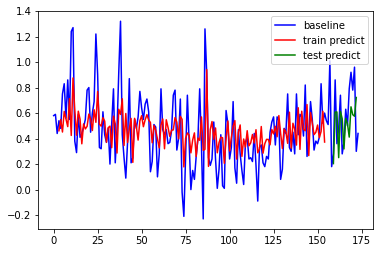

In [9]:
plt.plot(experiments[0][0], color='blue', label='baseline')
plt.plot(experiments[0][1], color='red', label='train predict')
plt.plot(experiments[0][2], color='green', label='test predict')
plt.legend(loc='upper rigth')
plt.show()

### RandomForest Regressor

In [59]:
def train_rfregressor(dataframe):
    # Random Forest Regressor for IPCA Problem
    import numpy
    import matplotlib.pyplot as plt
    from pandas import read_csv
    import math
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import mean_squared_error
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.datasets import make_regression

    # create dataset matrix
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return numpy.array(dataX), numpy.array(dataY)

    dataframe.sort_values(by='Month', ascending=True, inplace=True)
    dataset = dataframe['indice'].to_frame()
    dataset = dataset.astype('float32')

    # normalize
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    # Split train / test(Jan/2017 a Set/2018)
    train_size = 156
    test_size = len(dataset) - train_size
    train = dataset[0:train_size]
    test = dataset[train_size:len(dataset)]
    
    # reshape into X=t and Y=t+1
    look_back = 3
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    # reshape input to be [samples, time steps, features]
    regr = RandomForestRegressor(max_depth=50, n_estimators=200, criterion='mae') # max_depth=10, random_state=0, n_estimators=100
    regr.fit(trainX, trainY)

    # make predictions
    train_predict = regr.predict(trainX)
    test_predict = regr.predict(testX)
    
    # calculate root mean squared error
    train_score = math.sqrt(mean_squared_error(trainY, train_predict))
    print('Train RMSE: %.5f' % (train_score))
    test_score = math.sqrt(mean_squared_error(testY, test_predict))
    print('Test RMSE: %.5f' % (test_score))

    train_score = mean_absolute_error(trainY, train_predict)
    print('Train MAE: %.5f' % (train_score))
    test_score = mean_absolute_error(testY, test_predict)
    print('Test MAE: %.5f' % (test_score))
    
    baseline = scaler.inverse_transform(dataset)

    return train_score, test_score


experiments = []
for i in range(30):#30
    print(f'------ Start experiment ------ {(i + 1)}')
    experiments.append(train_rfregressor(dataframe))
    print(f'End experiment {(i + 1)}')

------ Start experiment ------ 1
Train RMSE: 0.06679
Test RMSE: 0.14420
Train MAE: 0.05132
Test MAE: 0.12286
End experiment 1
------ Start experiment ------ 2
Train RMSE: 0.07117
Test RMSE: 0.14292
Train MAE: 0.05355
Test MAE: 0.12441
End experiment 2
------ Start experiment ------ 3
Train RMSE: 0.06860
Test RMSE: 0.14603
Train MAE: 0.05167
Test MAE: 0.12247
End experiment 3
------ Start experiment ------ 4
Train RMSE: 0.06867
Test RMSE: 0.14386
Train MAE: 0.05181
Test MAE: 0.12203
End experiment 4
------ Start experiment ------ 5
Train RMSE: 0.06873
Test RMSE: 0.14573
Train MAE: 0.05320
Test MAE: 0.12212
End experiment 5
------ Start experiment ------ 6
Train RMSE: 0.07311
Test RMSE: 0.14448
Train MAE: 0.05436
Test MAE: 0.12088
End experiment 6
------ Start experiment ------ 7
Train RMSE: 0.06827
Test RMSE: 0.13967
Train MAE: 0.05179
Test MAE: 0.11850
End experiment 7
------ Start experiment ------ 8
Train RMSE: 0.06868
Test RMSE: 0.14639
Train MAE: 0.05165
Test MAE: 0.12717
End exper

In [18]:
def train_svm(dataframe):
    # Random Forest Regressor for IPCA Problem
    import numpy
    import matplotlib.pyplot as plt
    from pandas import read_csv
    import math
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import mean_squared_error
    from sklearn.svm import SVR

    # create dataset matrix
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return numpy.array(dataX), numpy.array(dataY)

    dataframe.sort_values(by='Month', ascending=True, inplace=True)
    dataset = dataframe['indice'].to_frame()
    dataset = dataset.astype('float32')

    # normalize
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    # Split train / test(Jan/2017 a Set/2018)
    train_size = 156
    test_size = len(dataset) - train_size
    train = dataset[0:train_size]
    test = dataset[train_size:len(dataset)]
    
    # reshape into X=t and Y=t+1
    look_back = 12
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    # reshape input to be [samples, time steps, features]
    regr = SVR() # max_depth=10, random_state=0, n_estimators=100
    regr.fit(trainX, trainY)

    # make predictions
    train_predict = regr.predict(trainX)
    test_predict = regr.predict(testX)
    
    # calculate root mean squared error

    test_score = math.sqrt(mean_squared_error(testY, test_predict))
    print('RMSE: %.5f' % (test_score))
    
    test_score = mean_absolute_error(testY, test_predict)
    print('Test MAE: %.5f' % (test_score))
    
    baseline = scaler.inverse_transform(dataset)

    return test_score


for i in range(30):
    print(f'------ Inicio ------ {(i + 1)}')
    train_svm(dataframe)
    print(f'Final {(i + 1)}')

------ Inicio ------ 1
RMSE: 0.22582
Test MAE: 0.22461
Final 1
------ Inicio ------ 2
RMSE: 0.22582
Test MAE: 0.22461
Final 2
------ Inicio ------ 3
RMSE: 0.22582
Test MAE: 0.22461
Final 3
------ Inicio ------ 4
RMSE: 0.22582
Test MAE: 0.22461
Final 4
------ Inicio ------ 5
RMSE: 0.22582
Test MAE: 0.22461
Final 5
------ Inicio ------ 6
RMSE: 0.22582
Test MAE: 0.22461
Final 6
------ Inicio ------ 7
RMSE: 0.22582
Test MAE: 0.22461
Final 7
------ Inicio ------ 8
RMSE: 0.22582
Test MAE: 0.22461
Final 8
------ Inicio ------ 9
RMSE: 0.22582
Test MAE: 0.22461
Final 9
------ Inicio ------ 10
RMSE: 0.22582
Test MAE: 0.22461
Final 10
------ Inicio ------ 11
RMSE: 0.22582
Test MAE: 0.22461
Final 11
------ Inicio ------ 12
RMSE: 0.22582
Test MAE: 0.22461
Final 12
------ Inicio ------ 13
RMSE: 0.22582
Test MAE: 0.22461
Final 13
------ Inicio ------ 14
RMSE: 0.22582
Test MAE: 0.22461
Final 14
------ Inicio ------ 15
RMSE: 0.22582
Test MAE: 0.22461
Final 15
------ Inicio ------ 16
RMSE: 0.22582
Test 

### Metrics

In [60]:
test_values_mae = [i[1] for i in experiments]

#variancia
v = np.var(test_values_mae)

#desvio padrão
d = np.sqrt(v)

#media
m = np.mean(test_values_mae)

print(f'Mean of MAE: {m}')
print(f'Standard deviation: {d}')
print(f'Variance: {v}')

Mean of MAE: 0.12421896387683362
Standard deviation: 0.0030893803868903267
Variance: 9.544271174902625e-06
